In [1]:
import os
import sys
module_path = os.path.abspath(
    os.path.join(
        "/Users",
        "chair",
        "Documents",
        "Academia",
        "SuperRes",
        "Biteen_colab",
        "Mispolarization",
        "python"
        )) 
sys.path.append(module_path)

import numpy as np

## Plotting stuff
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
## Parameter setting needs to be in cell following mpl import for some reason 
## https://github.com/jupyter/notebook/issues/3385
##
## Default parameters inspired by 
## http://nipunbatra.github.io/2014/08/latexify/
params = {
    'text.latex.preamble': ['\\usepackage{gensymb}'],
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'magma',
    'axes.grid': False,
    'figure.dpi': 600,  # to adjust notebook inline plot size
    'savefig.dpi': 600,  # to adjust notebook inline plot size
#     'axes.labelsize': 12, # fontsize for x and y labels (was 10)
    'axes.titlesize': 14,
    'font.size': 8, # was 10
#     'savefig.dpi': 150,  # to adjust notebook inline plot size
    'axes.labelsize': 10, # fontsize for x and y labels (was 10)
    'axes.titlesize': 10,
    'font.size': 8, # was 10
    'legend.fontsize': 8, # was 10
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'text.usetex': True,
    'figure.figsize': [3.39, 2.10],
    'font.family': 'serif',
    'figure.max_open_warning':10001
}
mpl.rcParams.update(params)
## For colorbar 
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Get physical constants from Scipy
import scipy.constants as con

## For fitting
import scipy.optimize as opt

## For matlab loading
import scipy.io as sio

## Load custom package modules
from misloc_mispol_package.calc import BEM_simulation_wrapper as bem
from misloc_mispol_package.calc import fitting_misLocalization as fit
from misloc_mispol_package.calc import coupled_dipoles as cp
from misloc_mispol_package.calc import knn as knn

from misloc_mispol_package.optics import diffraction_int as diffi
from misloc_mispol_package.optics import fibonacci as fib

## Some useful numerical constants
hbar = con.physical_constants['Planck constant over 2 pi in eV s'][0]
c = con.physical_constants['speed of light in vacuum'][0]*1e2 #cm/m

cm_per_nm = fit.cm_per_nm

eps_b = 1.778 ## Water

hres_obs_pts = diffi.observation_points(
    -480*cm_per_nm, 480*cm_per_nm, -480*cm_per_nm, 480*cm_per_nm, 201)

In [3]:
disk_diameter = 86
disk_radius = disk_diameter/2

exp_res_param_file = f'disk_JC_d{disk_diameter}_transFit_expRes'
high_res_param_file = f'disk_JC_d{disk_diameter}_transFit_highRes'

In [4]:
# param_file = exp_res_param_file

# locations, angles = fit.fixed_ori_mol_placement(
#     mol_grid_pts_1D=2, x_max=150, y_max=150)
# sim_inst_0 = bem.SimulatedExperiment(
#     locations, 
#     mol_angle=0,
#     param_file=param_file,
#     simulation_file_name=f'CurlyDiskJC_NoSub_dipDrive_E_d{disk_diameter}')
# sim_inst_0.trial_images = sim_inst_0.calculate_BEM_fields()

# # Model fit
# # Gaussian guess, checked

# fit_inst_0 = fit.FitModelToData(
#     sim_inst_0.BEM_images, 
# #     ini_guess=simTestInst_few_mol.mol_locations,
#     ini_guess='gauss',
#     param_file=param_file
#     )
# the_fit = fit_inst_0.fit_model_to_image_data(
#     check_ini=True,
#     let_mol_ori_out_of_plane=True)

# sim_inst_0.calculate_polarization()
# bem.save_sim_exp_inst(sim_inst_0, f'test_sim_inst_xmol_grid_d{disk_diameter}')
# bem.save_fit_inst(fit_inst_0, sim_inst_0, f'test_fit_inst_xmol_grid_d{disk_diameter}')

In [5]:
# ## Plot fit results
# # fit_inst_0.plot_fit_results_as_quiver_map(sim_inst_0)   

# fig5 = bem.fig5_3D(
#     sim_inst_0, 
#     fit_inst_0, 
#     draw_quadrant=True, 
#     show_ax_labels=True,
#     quiv_ax_limits=[-25, 175, -25, 175],
#     quiv_tick_list=np.linspace(0,150,7),
#     quiv_ticklabel_list=[r'$0$', r'$25$',r'$50$',r'$75$',r'$100$',r'$125$', r'$150$'],
#     )

# # ## Histogram fits
# # plt.figure()
# # fit_pos = fit_inst_0.model_fit_results[:, :2]
# # radial_fit_pos = np.sqrt(np.sum(fit_pos**2, axis=1))
# # hist, _, _ = plt.hist(radial_fit_pos)
# # plt.vlines(
# #     sim_inst_0.a_long_meters / fit.cm_per_nm, 0, hist.max(),
# #     lw=1, color='gray', linestyle='--')

# # plt.xlabel('Radial fit location')
# # plt.ylabel('Number of molecules')

In [6]:
param_file = exp_res_param_file

locations, angles = fit.fixed_ori_mol_placement(
    mol_grid_pts_1D=7, x_max=150, y_max=150)
sim_inst_0 = bem.SimulatedExperiment(
    locations, 
    mol_angle=0,
    param_file=param_file,
    simulation_file_name=f'CurlyDiskJC_NoSub_dipDrive_E_d{disk_diameter}')
sim_inst_0.trial_images = sim_inst_0.calculate_BEM_fields()

# Model fit
# Gaussian guess, checked

fit_inst_0 = fit.FitModelToData(
    sim_inst_0.BEM_images, 
#     ini_guess=simTestInst_few_mol.mol_locations,
    ini_guess='gauss',
    param_file=param_file
    )
the_fit = fit_inst_0.fit_model_to_image_data(
    check_ini=True,
    let_mol_ori_out_of_plane=True)

sim_inst_0.calculate_polarization()
bem.save_sim_exp_inst(sim_inst_0, f'sim_inst_xmol_grid_d{disk_diameter}_transFit')
bem.save_fit_inst(fit_inst_0, sim_inst_0, f'fit_inst_xmol_grid_d{disk_diameter}_transFit')

No 'quench_over_real_disk' param found in file.


/Users/chair/Documents/Academia/SuperRes/Biteen_colab/Mispolarization/python/misloc_mispol_package/optics/anal_foc_diff_fields.py:27: RuntimeWarning: invalid value encountered in true_divide
  sphj1_on_krho = spf.spherical_jn( 1, k*rho(xi, y) )/(k*rho(xi, y))
/Users/chair/Documents/Academia/SuperRes/Biteen_colab/Mispolarization/python/misloc_mispol_package/optics/anal_foc_diff_fields.py:30: RuntimeWarning: invalid value encountered in true_divide
  j2_on_krho = spf.jv(2, k*rho(xi, y) )/(k*rho(xi, y))
/Users/chair/Documents/Academia/SuperRes/Biteen_colab/Mispolarization/python/misloc_mispol_package/optics/anal_foc_diff_fields.py:75: RuntimeWarning: invalid value encountered in true_divide
  j2_on_krho = spf.jv(2, k*rho(xi, y) )/(k*rho(xi, y))
/Users/chair/Documents/Academia/SuperRes/Biteen_colab/Mispolarization/python/misloc_mispol_package/optics/anal_foc_diff_fields.py:78: RuntimeWarning: divide by zero encountered in true_divide
  sphj0_on_krhosqrd = spf.spherical_jn(0, k*rho(xi, y) )

No 'quench_over_real_disk' param found in file.
starting Matlab...
given even number of points for Fibonacci lattice, 
  adding 1...
1th molecule
calculating diffracted fields
2th molecule
calculating diffracted fields
3th molecule
calculating diffracted fields
4th molecule
calculating diffracted fields
5th molecule
calculating diffracted fields
6th molecule
calculating diffracted fields
7th molecule
calculating diffracted fields
8th molecule
calculating diffracted fields
9th molecule
calculating diffracted fields
10th molecule
calculating diffracted fields
11th molecule
calculating diffracted fields
12th molecule
calculating diffracted fields
13th molecule
calculating diffracted fields
14th molecule
calculating diffracted fields
15th molecule
calculating diffracted fields
16th molecule
calculating diffracted fields
17th molecule
calculating diffracted fields
18th molecule
calculating diffracted fields
19th molecule
calculating diffracted fields
20th molecule
calculating diffracted fie

In [4]:
sim_inst_0 = bem.LoadedSimExp(f'sim_inst_xmol_grid_d{disk_diameter}_transFit', exp_res_param_file)
fit_inst_0 = bem.LoadedFit(f'fit_inst_xmol_grid_d{disk_diameter}_transFit', exp_res_param_file)

No 'quench_over_real_disk' param found in file.
No 'quench_over_real_disk' param found in file.
No 'quench_over_real_disk' param found in file.
No 'quench_over_real_disk' param found in file.


Calculating Gaussian centroid with BEM_images


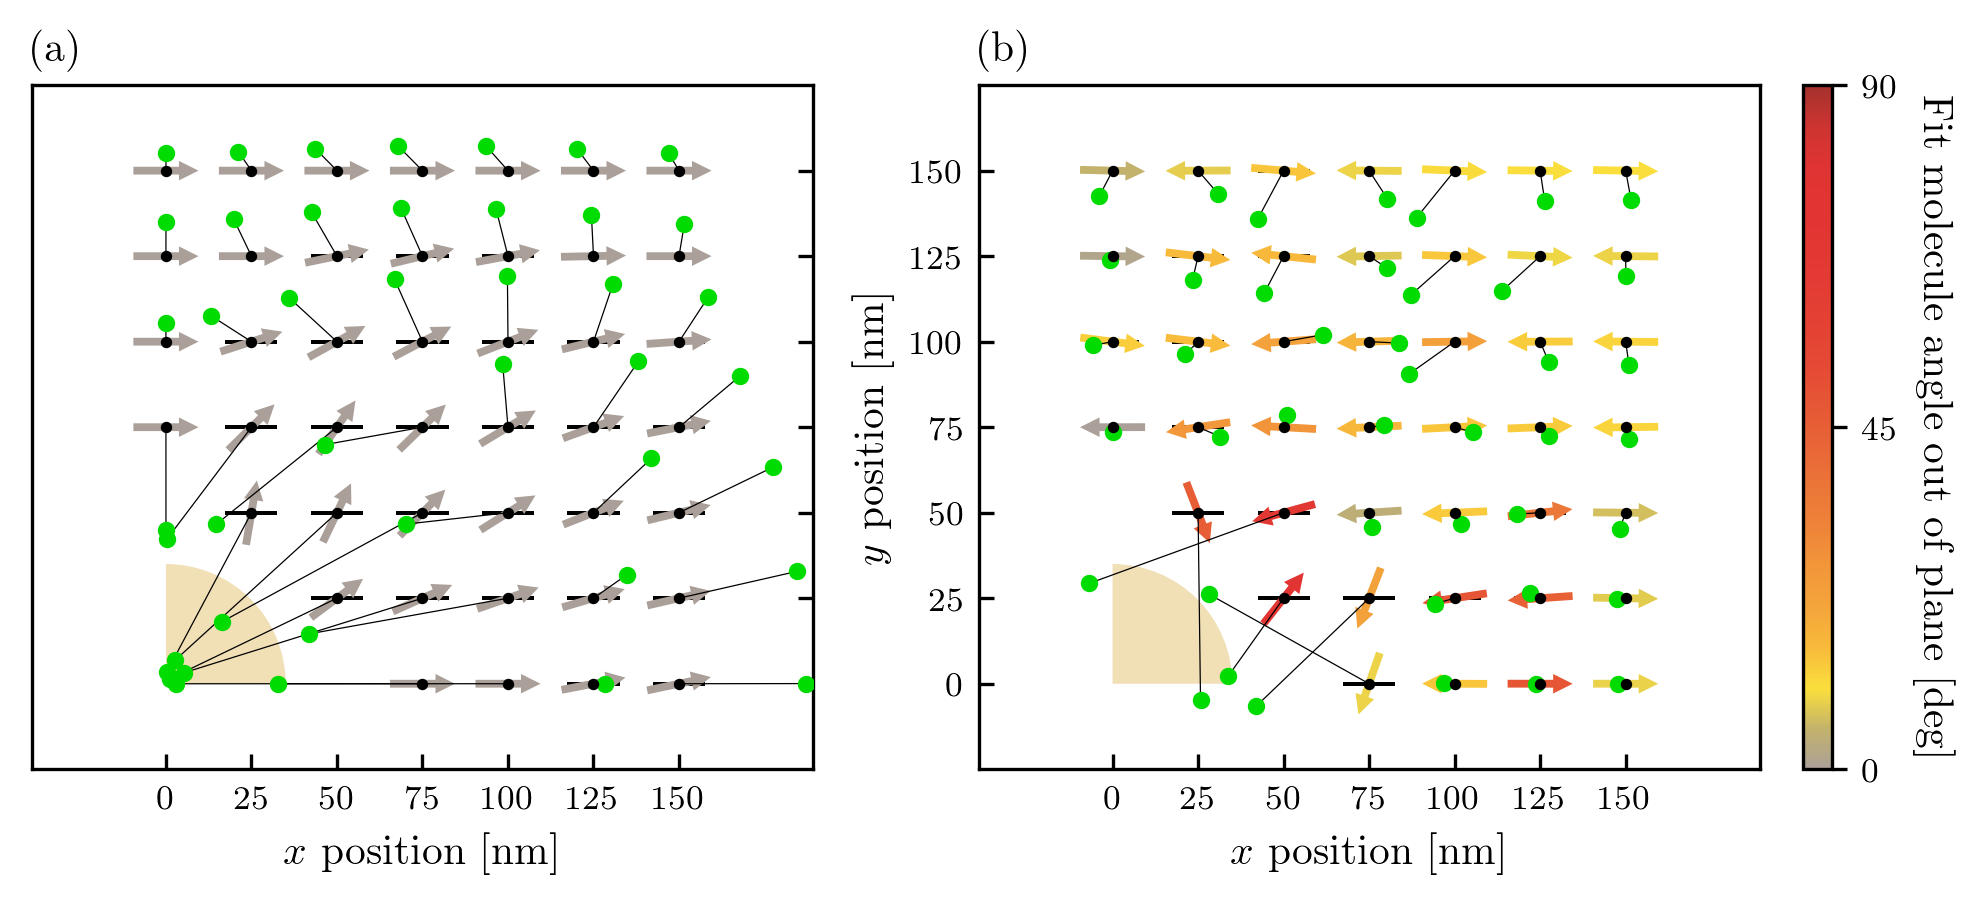

In [5]:
## Plot fit results
# fit_inst_0.plot_fit_results_as_quiver_map(sim_inst_0)   

fig5 = bem.fig5_3D(
    sim_inst_0, 
    fit_inst_0, 
    draw_quadrant=True, 
#     show_ax_labels=True,
    quiv_ax_limits=[-25, 175, -25, 175],
    quiv_tick_list=np.linspace(0,150,7),
    quiv_ticklabel_list=[r'$0$', r'$25$',r'$50$',r'$75$',r'$100$',r'$125$', r'$150$'],
#     plot_ellipse=False
    )

# ## Histogram fits
# plt.figure()
# fit_pos = fit_inst_0.model_fit_results[:, :2]
# radial_fit_pos = np.sqrt(np.sum(fit_pos**2, axis=1))
# hist, _, _ = plt.hist(radial_fit_pos)
# plt.vlines(
#     sim_inst_0.a_long_meters / fit.cm_per_nm, 0, hist.max(),
#     lw=1, color='gray', linestyle='--')

# plt.xlabel('Radial fit location')
# plt.ylabel('Number of molecules')

In [15]:
param_file = high_res_param_file

locations, angles = fit.fixed_ori_mol_placement(
    mol_grid_pts_1D=7, x_max=150, y_max=150)
sim_inst_0h = bem.SimulatedExperiment(
    locations, 
    mol_angle=0,
    param_file=param_file,
    simulation_file_name=f'CurlyDiskJC_NoSub_dipDrive_E_d{disk_diameter}')
sim_inst_0h.trial_images = sim_inst_0h.calculate_BEM_fields()

# Model fit
# Gaussian guess, checked

fit_inst_0h = fit.FitModelToData(
    sim_inst_0h.BEM_images, 
#     ini_guess=simTestInst_few_mol.mol_locations,
    ini_guess='gauss',
    param_file=param_file
    )
the_fit = fit_inst_0h.fit_model_to_image_data(
    check_ini=True,
    let_mol_ori_out_of_plane=True)

sim_inst_0h.calculate_polarization()
bem.save_sim_exp_inst(sim_inst_0h, f'sim_inst_xmol_grid_d{disk_diameter}_transFit_hr')
bem.save_fit_inst(fit_inst_0h, sim_inst_0h, f'fit_inst_xmol_grid_d{disk_diameter}_transFit_hr')

No 'quench_over_real_disk' param found in file.


/Users/chair/Documents/Academia/SuperRes/Biteen_colab/Mispolarization/python/misloc_mispol_package/optics/anal_foc_diff_fields.py:27: RuntimeWarning: divide by zero encountered in true_divide
  sphj1_on_krho = spf.spherical_jn( 1, k*rho(xi, y) )/(k*rho(xi, y))
/Users/chair/Documents/Academia/SuperRes/Biteen_colab/Mispolarization/python/misloc_mispol_package/optics/anal_foc_diff_fields.py:27: RuntimeWarning: invalid value encountered in true_divide
  sphj1_on_krho = spf.spherical_jn( 1, k*rho(xi, y) )/(k*rho(xi, y))
/Users/chair/Documents/Academia/SuperRes/Biteen_colab/Mispolarization/python/misloc_mispol_package/optics/anal_foc_diff_fields.py:30: RuntimeWarning: divide by zero encountered in true_divide
  j2_on_krho = spf.jv(2, k*rho(xi, y) )/(k*rho(xi, y))
/Users/chair/Documents/Academia/SuperRes/Biteen_colab/Mispolarization/python/misloc_mispol_package/optics/anal_foc_diff_fields.py:30: RuntimeWarning: invalid value encountered in true_divide
  j2_on_krho = spf.jv(2, k*rho(xi, y) )/(

No 'quench_over_real_disk' param found in file.
starting Matlab...
given even number of points for Fibonacci lattice, 
  adding 1...
1th molecule
calculating diffracted fields
2th molecule
calculating diffracted fields
3th molecule
calculating diffracted fields
4th molecule
calculating diffracted fields
5th molecule
calculating diffracted fields
6th molecule
calculating diffracted fields
7th molecule
calculating diffracted fields
8th molecule
calculating diffracted fields
9th molecule
calculating diffracted fields
10th molecule
calculating diffracted fields
11th molecule
calculating diffracted fields
12th molecule
calculating diffracted fields
13th molecule
calculating diffracted fields
14th molecule
calculating diffracted fields
15th molecule
calculating diffracted fields
16th molecule
calculating diffracted fields
17th molecule
calculating diffracted fields
18th molecule
calculating diffracted fields
19th molecule
calculating diffracted fields
20th molecule
calculating diffracted fie

In [6]:
sim_inst_0h = bem.LoadedSimExp(f'sim_inst_xmol_grid_d{disk_diameter}_transFit_hr', high_res_param_file)
fit_inst_0h = bem.LoadedFit(f'fit_inst_xmol_grid_d{disk_diameter}_transFit_hr', high_res_param_file)

No 'quench_over_real_disk' param found in file.
No 'quench_over_real_disk' param found in file.
No 'quench_over_real_disk' param found in file.
No 'quench_over_real_disk' param found in file.


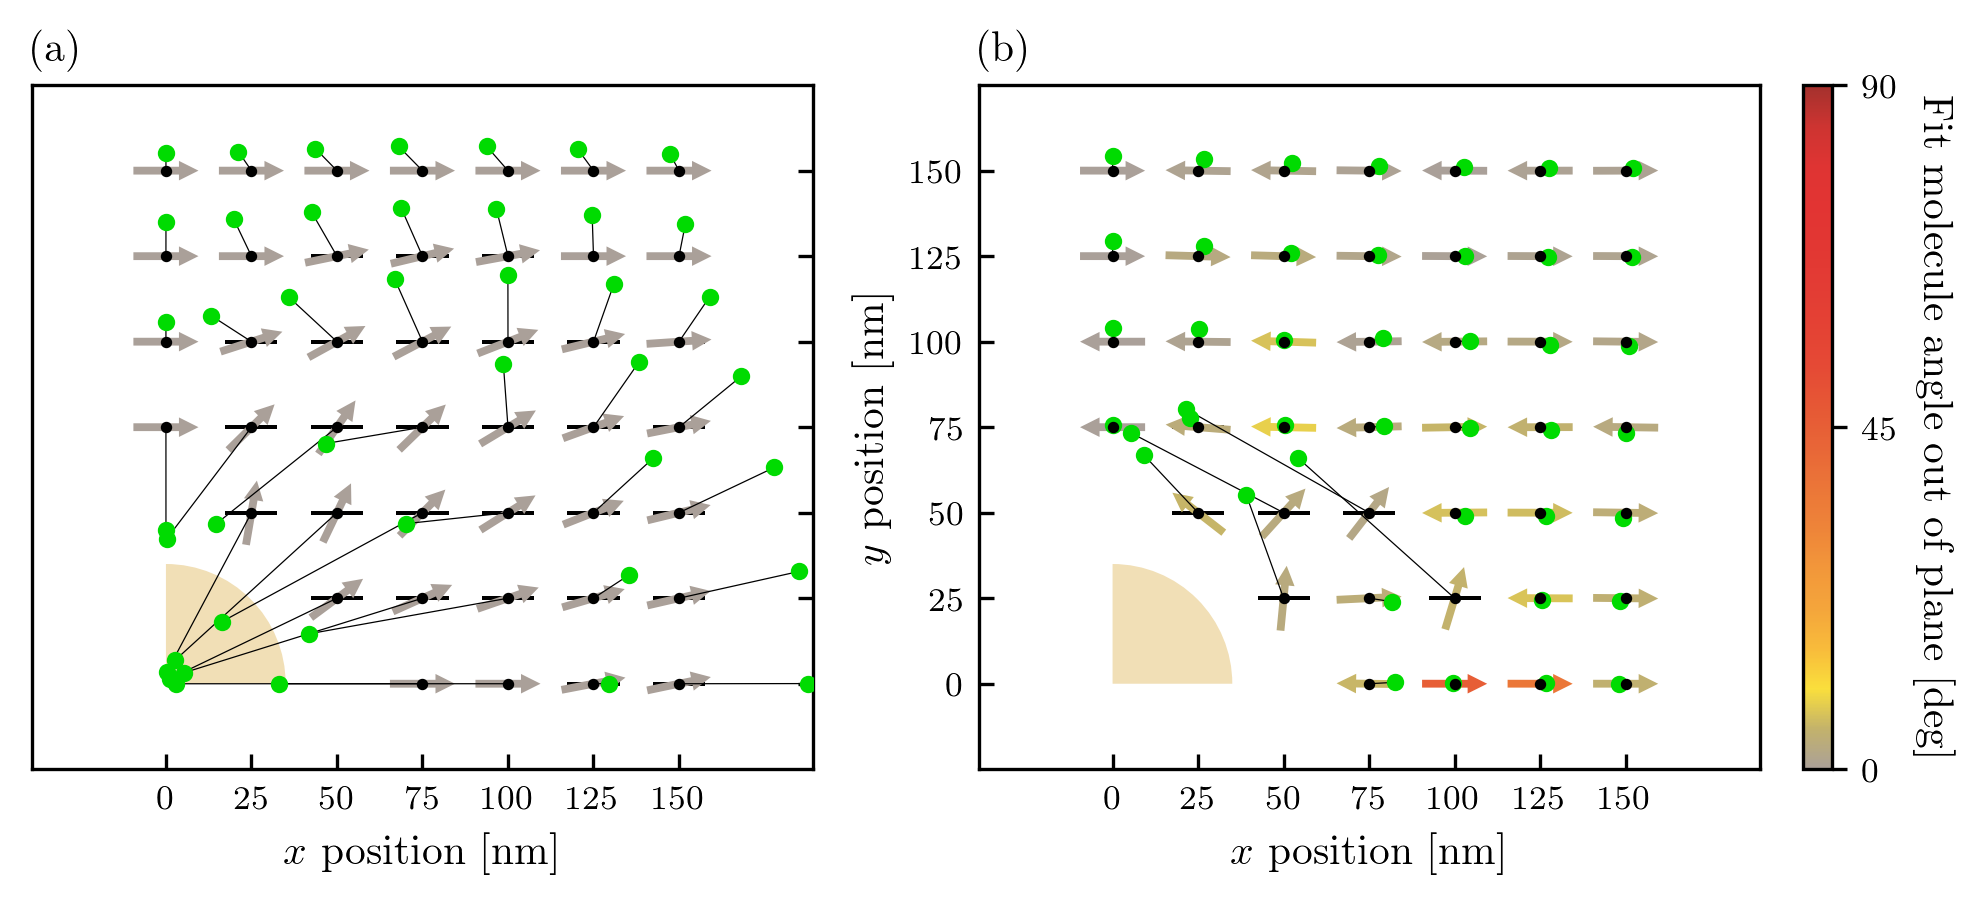

In [8]:
## Plot fit results
# fit_inst_0h.plot_fit_results_as_quiver_map(sim_inst_0h)   

fig5 = bem.fig5_3D(
    sim_inst_0h, 
    fit_inst_0h, 
    draw_quadrant=True, 
#     show_ax_labels=True,
    quiv_ax_limits=[-25, 175, -25, 175],
    quiv_tick_list=np.linspace(0,150,7),
    quiv_ticklabel_list=[r'$0$', r'$25$',r'$50$',r'$75$',r'$100$',r'$125$', r'$150$'],
    )

# ## Histogram fits
# plt.figure()
# fit_pos = fit_inst_0h.model_fit_results[:, :2]
# radial_fit_pos = np.sqrt(np.sum(fit_pos**2, axis=1))
# hist, _, _ = plt.hist(radial_fit_pos)
# plt.vlines(
#     sim_inst_0h.a_long_meters / fit.cm_per_nm, 0, hist.max(),
#     lw=1, color='gray', linestyle='--')

# plt.xlabel('Radial fit location')
# plt.ylabel('Number of molecules')

In [8]:
param_file = exp_res_param_file

locations, angles = fit.fixed_ori_mol_placement(
    mol_grid_pts_1D=7, x_max=150, y_max=150)
oop_angles = np.zeros((locations.shape[0], 2))

sim_inst_1 = bem.SimulatedExperiment(
    locations, 
    mol_angle=oop_angles,
    param_file=param_file,
    simulation_file_name=f'CurlyDiskJC_NoSub_dipDrive_E_d{disk_diameter}')
sim_inst_1.trial_images = sim_inst_1.calculate_BEM_fields()

# Model fit
# Gaussian guess, checked

fit_inst_1 = fit.FitModelToData(
    sim_inst_1.BEM_images, 
#     ini_guess=simTestInst_few_mol.mol_locations,
    ini_guess='gauss',
    param_file=param_file
    )
the_fit = fit_inst_1.fit_model_to_image_data(
    check_ini=True,
    let_mol_ori_out_of_plane=True)

sim_inst_1.calculate_polarization()
bem.save_sim_exp_inst(sim_inst_1, f'sim_inst_zmol_grid_d{disk_diameter}_transFit')
bem.save_fit_inst(fit_inst_1, sim_inst_1, f'fit_inst_zmol_grid_d{disk_diameter}_transFit')

No 'quench_over_real_disk' param found in file.


/Users/chair/Documents/Academia/SuperRes/Biteen_colab/Mispolarization/python/misloc_mispol_package/optics/anal_foc_diff_fields.py:27: RuntimeWarning: invalid value encountered in true_divide
  sphj1_on_krho = spf.spherical_jn( 1, k*rho(xi, y) )/(k*rho(xi, y))
/Users/chair/Documents/Academia/SuperRes/Biteen_colab/Mispolarization/python/misloc_mispol_package/optics/anal_foc_diff_fields.py:30: RuntimeWarning: invalid value encountered in true_divide
  j2_on_krho = spf.jv(2, k*rho(xi, y) )/(k*rho(xi, y))
/Users/chair/Documents/Academia/SuperRes/Biteen_colab/Mispolarization/python/misloc_mispol_package/optics/anal_foc_diff_fields.py:75: RuntimeWarning: invalid value encountered in true_divide
  j2_on_krho = spf.jv(2, k*rho(xi, y) )/(k*rho(xi, y))
/Users/chair/Documents/Academia/SuperRes/Biteen_colab/Mispolarization/python/misloc_mispol_package/optics/anal_foc_diff_fields.py:78: RuntimeWarning: divide by zero encountered in true_divide
  sphj0_on_krhosqrd = spf.spherical_jn(0, k*rho(xi, y) )

No 'quench_over_real_disk' param found in file.
starting Matlab...
given even number of points for Fibonacci lattice, 
  adding 1...
1th molecule
mol_orientation = [0.0, 0.0, 1.0]
calculating diffracted fields
2th molecule
mol_orientation = [0.0, 0.0, 1.0]
calculating diffracted fields
3th molecule
mol_orientation = [0.0, 0.0, 1.0]
calculating diffracted fields
4th molecule
mol_orientation = [0.0, 0.0, 1.0]
calculating diffracted fields
5th molecule
mol_orientation = [0.0, 0.0, 1.0]
calculating diffracted fields
6th molecule
mol_orientation = [0.0, 0.0, 1.0]
calculating diffracted fields
7th molecule
mol_orientation = [0.0, 0.0, 1.0]
calculating diffracted fields
8th molecule
mol_orientation = [0.0, 0.0, 1.0]
calculating diffracted fields
9th molecule
mol_orientation = [0.0, 0.0, 1.0]
calculating diffracted fields
10th molecule
mol_orientation = [0.0, 0.0, 1.0]
calculating diffracted fields
11th molecule
mol_orientation = [0.0, 0.0, 1.0]
calculating diffracted fields
12th molecule
mol_

In [9]:
sim_inst_1 = bem.LoadedSimExp(f'sim_inst_zmol_grid_d{disk_diameter}_transFit', exp_res_param_file)
fit_inst_1 = bem.LoadedFit(f'fit_inst_zmol_grid_d{disk_diameter}_transFit', exp_res_param_file)

No 'quench_over_real_disk' param found in file.
No 'quench_over_real_disk' param found in file.
No 'quench_over_real_disk' param found in file.
No 'quench_over_real_disk' param found in file.


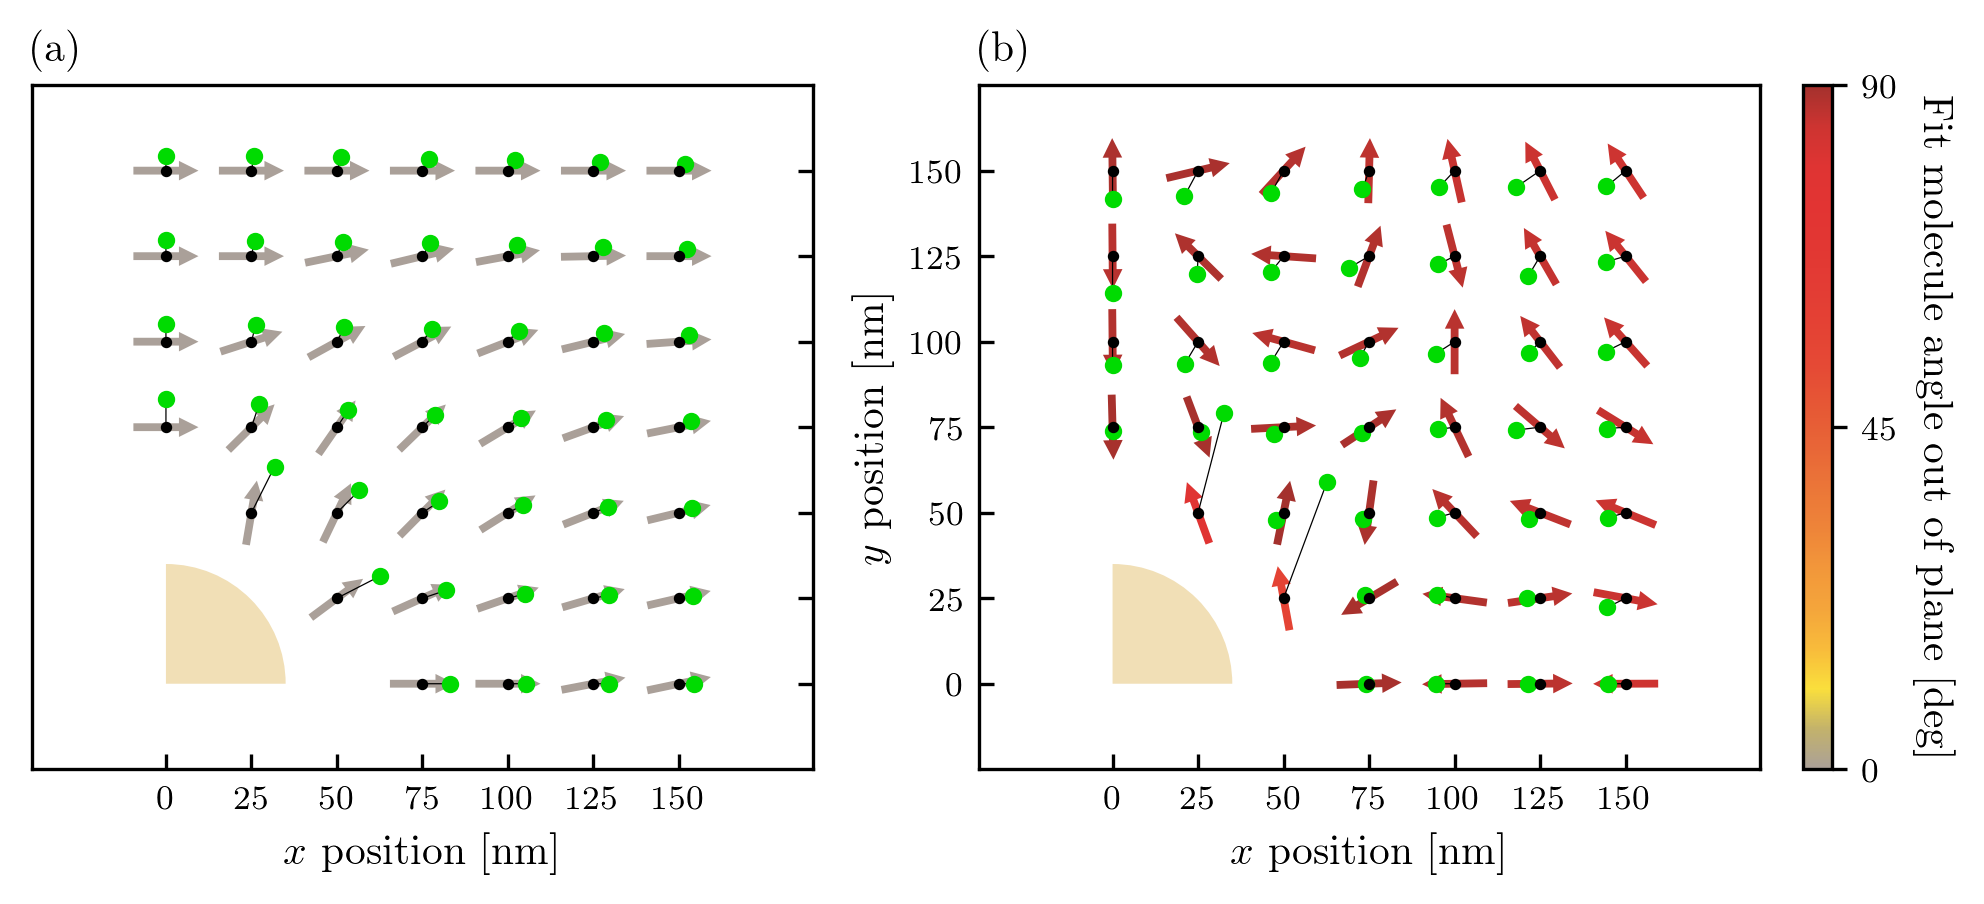

In [11]:
## Plot fit results
# fit_inst_0.plot_fit_results_as_quiver_map(sim_inst_0)   

fig5 = bem.fig5_3D(
    sim_inst_1, 
    fit_inst_1, 
    draw_quadrant=True, 
#     show_ax_labels=True,
    quiv_ax_limits=[-25, 175, -25, 175],
    quiv_tick_list=np.linspace(0,150,7),
    quiv_ticklabel_list=[r'$0$', r'$25$',r'$50$',r'$75$',r'$100$',r'$125$', r'$150$'],
    plot_ellipse=False
    )

# ## Histogram fits
# plt.figure()
# fit_pos = fit_inst_0.model_fit_results[:, :2]
# radial_fit_pos = np.sqrt(np.sum(fit_pos**2, axis=1))
# hist, _, _ = plt.hist(radial_fit_pos)
# plt.vlines(
#     sim_inst_0.a_long_meters / fit.cm_per_nm, 0, hist.max(),
#     lw=1, color='gray', linestyle='--')

# plt.xlabel('Radial fit location')
# plt.ylabel('Number of molecules')

In [19]:
param_file = high_res_param_file

locations, angles = fit.fixed_ori_mol_placement(
    mol_grid_pts_1D=7, x_max=150, y_max=150)
oop_angles = np.zeros((locations.shape[0], 2))

sim_inst_1h = bem.SimulatedExperiment(
    locations, 
    mol_angle=oop_angles,
    param_file=param_file,
    simulation_file_name=f'CurlyDiskJC_NoSub_dipDrive_E_d{disk_diameter}')
sim_inst_1h.trial_images = sim_inst_1h.calculate_BEM_fields()

# Model fit
# Gaussian guess, checked

fit_inst_1h = fit.FitModelToData(
    sim_inst_1h.BEM_images, 
#     ini_guess=simTestInst_few_mol.mol_locations,
    ini_guess='gauss',
    param_file=param_file
    )
the_fit = fit_inst_1h.fit_model_to_image_data(
    check_ini=True,
    let_mol_ori_out_of_plane=True)

sim_inst_1h.calculate_polarization()
bem.save_sim_exp_inst(sim_inst_1h, f'sim_inst_zmol_grid_d{disk_diameter}_transFit_hr')
bem.save_fit_inst(fit_inst_1h, sim_inst_1h, f'fit_inst_zmol_grid_d{disk_diameter}_transFit_hr')

No 'quench_over_real_disk' param found in file.


/Users/chair/Documents/Academia/SuperRes/Biteen_colab/Mispolarization/python/misloc_mispol_package/optics/anal_foc_diff_fields.py:27: RuntimeWarning: divide by zero encountered in true_divide
  sphj1_on_krho = spf.spherical_jn( 1, k*rho(xi, y) )/(k*rho(xi, y))
/Users/chair/Documents/Academia/SuperRes/Biteen_colab/Mispolarization/python/misloc_mispol_package/optics/anal_foc_diff_fields.py:27: RuntimeWarning: invalid value encountered in true_divide
  sphj1_on_krho = spf.spherical_jn( 1, k*rho(xi, y) )/(k*rho(xi, y))
/Users/chair/Documents/Academia/SuperRes/Biteen_colab/Mispolarization/python/misloc_mispol_package/optics/anal_foc_diff_fields.py:30: RuntimeWarning: divide by zero encountered in true_divide
  j2_on_krho = spf.jv(2, k*rho(xi, y) )/(k*rho(xi, y))
/Users/chair/Documents/Academia/SuperRes/Biteen_colab/Mispolarization/python/misloc_mispol_package/optics/anal_foc_diff_fields.py:30: RuntimeWarning: invalid value encountered in true_divide
  j2_on_krho = spf.jv(2, k*rho(xi, y) )/(

No 'quench_over_real_disk' param found in file.
starting Matlab...
given even number of points for Fibonacci lattice, 
  adding 1...
1th molecule
mol_orientation = [0.0, 0.0, 1.0]
calculating diffracted fields
2th molecule
mol_orientation = [0.0, 0.0, 1.0]
calculating diffracted fields
3th molecule
mol_orientation = [0.0, 0.0, 1.0]
calculating diffracted fields
4th molecule
mol_orientation = [0.0, 0.0, 1.0]
calculating diffracted fields
5th molecule
mol_orientation = [0.0, 0.0, 1.0]
calculating diffracted fields
6th molecule
mol_orientation = [0.0, 0.0, 1.0]
calculating diffracted fields
7th molecule
mol_orientation = [0.0, 0.0, 1.0]
calculating diffracted fields
8th molecule
mol_orientation = [0.0, 0.0, 1.0]
calculating diffracted fields
9th molecule
mol_orientation = [0.0, 0.0, 1.0]
calculating diffracted fields
10th molecule
mol_orientation = [0.0, 0.0, 1.0]
calculating diffracted fields
11th molecule
mol_orientation = [0.0, 0.0, 1.0]
calculating diffracted fields
12th molecule
mol_

In [12]:
sim_inst_1h = bem.LoadedSimExp(f'sim_inst_zmol_grid_d{disk_diameter}_transFit_hr', high_res_param_file)
fit_inst_1h = bem.LoadedFit(f'fit_inst_zmol_grid_d{disk_diameter}_transFit_hr', high_res_param_file)

No 'quench_over_real_disk' param found in file.
No 'quench_over_real_disk' param found in file.
No 'quench_over_real_disk' param found in file.
No 'quench_over_real_disk' param found in file.


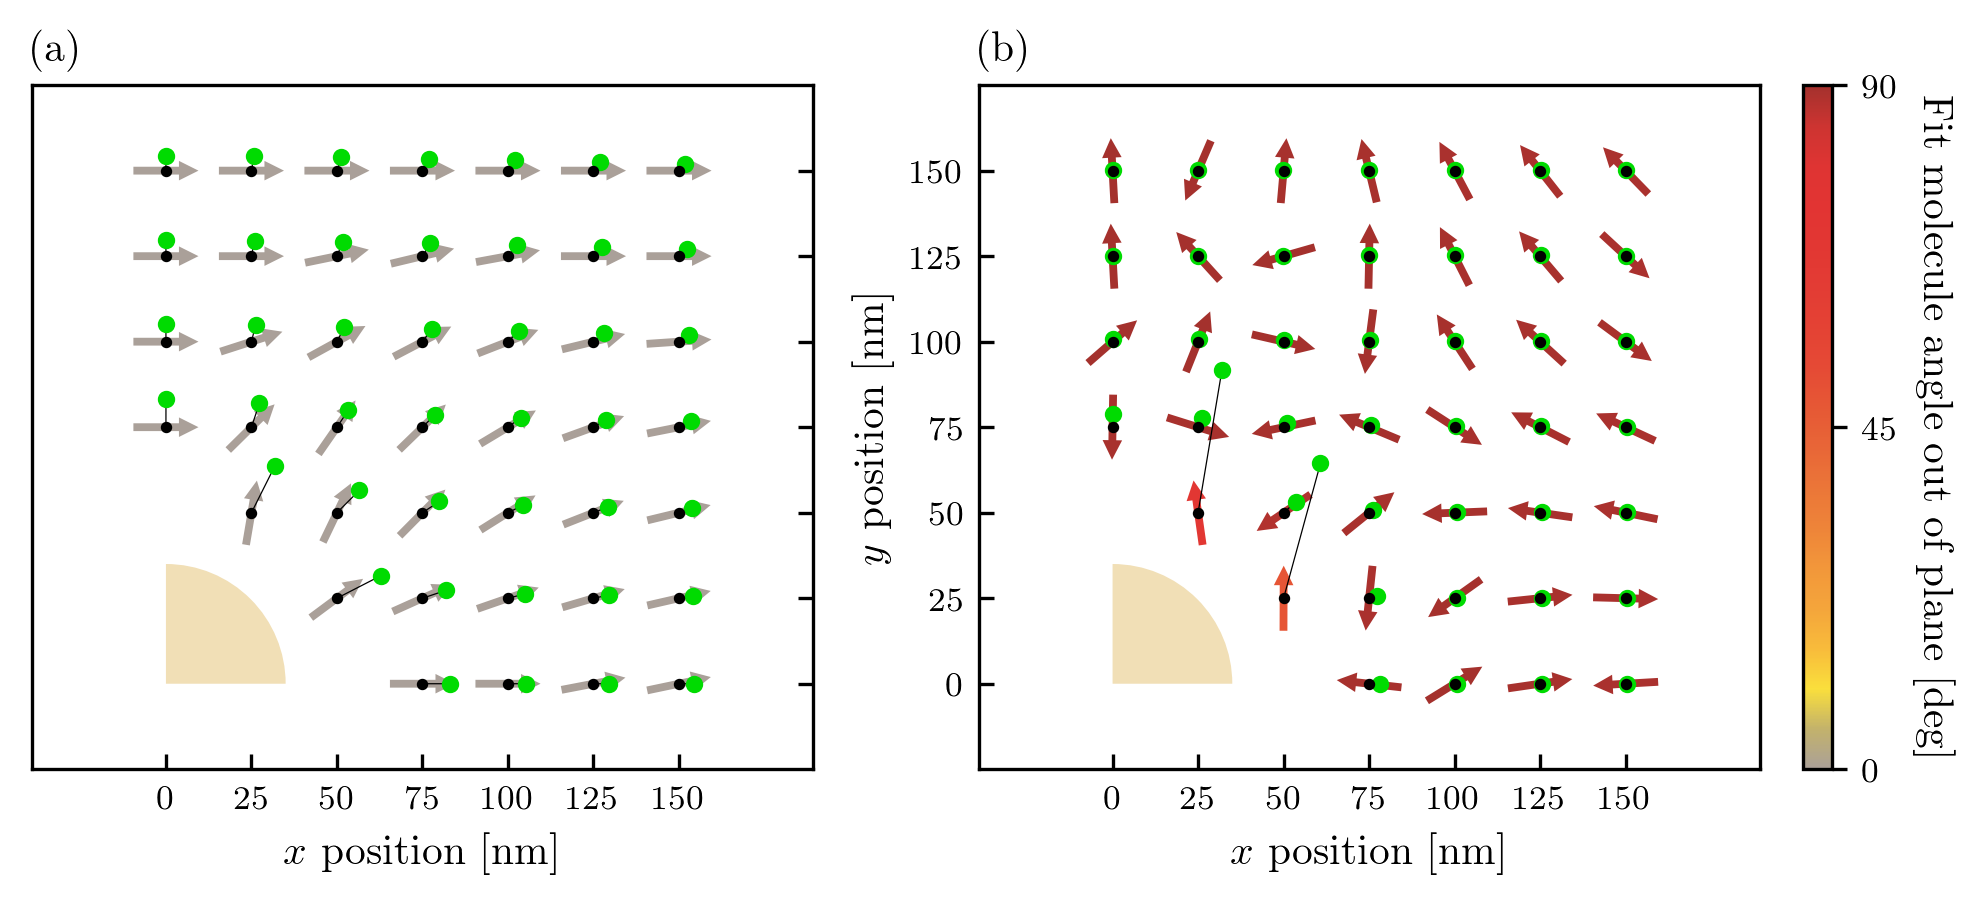

In [14]:
## Plot fit results
# fit_inst_0.plot_fit_results_as_quiver_map(sim_inst_0)   

fig5 = bem.fig5_3D(
    sim_inst_1h, 
    fit_inst_1h, 
    draw_quadrant=True, 
#     show_ax_labels=True,
    quiv_ax_limits=[-25, 175, -25, 175],
    quiv_tick_list=np.linspace(0,150,7),
    quiv_ticklabel_list=[r'$0$', r'$25$',r'$50$',r'$75$',r'$100$',r'$125$', r'$150$'],
    plot_ellipse=False
    )

# ## Histogram fits
# plt.figure()
# fit_pos = fit_inst_0.model_fit_results[:, :2]
# radial_fit_pos = np.sqrt(np.sum(fit_pos**2, axis=1))
# hist, _, _ = plt.hist(radial_fit_pos)
# plt.vlines(
#     sim_inst_0.a_long_meters / fit.cm_per_nm, 0, hist.max(),
#     lw=1, color='gray', linestyle='--')

# plt.xlabel('Radial fit location')
# plt.ylabel('Number of molecules')

In [10]:
param_file = exp_res_param_file
# disk_radius = 70/2

## Set up molucule locations
## Set molecule positions 
num_per_arc = 1000

## The angle and radii ranges must be defined as lists in order to 
## expand them below to get a spherical coordinate for each dipole.
angle_range = np.linspace(0, np.pi/2, num_per_arc).tolist()
radii_range = [disk_radius,]

number_of_mols = len(angle_range) * len(radii_range)

## Build list of angles for each molecule
angles = (angle_range)*len(radii_range)
## Build list of radii for each molecule
# radii = [[val]*len(angle_range)for val in radii_range]
## Flatten
# radii = [item for sublist in radii for item in sublist]
radii = [disk_radius + 10,] * num_per_arc

locations = fib.sphere_to_cart(
    thetas=np.ones(number_of_mols)*np.pi/2,
    phis=angles,
    rs=radii
    )

## Generate random thetas and phis for molecule orientations
## but fixed to the cylindrical tangent... 
np.random.seed(0)
thetas = np.ones(number_of_mols) * np.pi/2
phis = np.random.random(number_of_mols) * np.pi * 2
mol_ori_angles = np.hstack((
    thetas[:, None],
    phis[:, None],
    np.ones((number_of_mols, 1))
    ))

## Convert random angles into a cartesien vector for rotation
mol_ori_vec = fib.sphere_to_cart(*mol_ori_angles.T)

## Rotate each molecule into y-z plane
mol_ori_vec = cp.rotation_by(np.pi/2, 'y') @ mol_ori_vec.T

## rotare each by angle between molecule-plasmon vector and x-axis about z
mol_ori_vec = (cp.rotation_by(np.asarray(angles), 'z') @ mol_ori_vec.T[..., None])

## reshape to be list of row vectors
mol_ori_vec = mol_ori_vec.reshape(number_of_mols, 3)

## Convert back to spherical coods (r, theta, phi) and keep just angles
mol_ori_angles = fib.cart_to_sphere(*mol_ori_vec.T).T[:, 1:]

## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## Run simulations
sim_inst_5 = bem.SimulatedExperiment(
    locations, 
    mol_angle=mol_ori_angles,
    param_file=param_file,
    simulation_file_name=f'CurlyDiskJC_NoSub_dipDrive_E_d{disk_diameter}',
    auto_quench=False
    )
sim_inst_5.trial_images = sim_inst_5.calculate_BEM_fields()

# Model fit
# Gaussian guess, checked

fit_inst_5 = fit.FitModelToData(
    sim_inst_5.BEM_images, 
#     ini_guess=simTestInst_few_mol.mol_locations,
    ini_guess='gauss',
    param_file=param_file,
    )
the_fit = fit_inst_5.fit_model_to_image_data(
    check_ini=True,
    let_mol_ori_out_of_plane=True)

## Plot fit results
# fit_inst_5.plot_fit_results_as_quiver_map(sim_inst_5)   

sim_inst_5.calculate_polarization()
bem.save_sim_exp_inst(sim_inst_5, f'sim_inst_randomOriTangent_d{disk_diameter}_transFit')
bem.save_fit_inst(fit_inst_5, sim_inst_5, f'fit_inst_randomOriTangent_d{disk_diameter}_transFit')

No 'quench_over_real_disk' param found in file.


/Users/chair/Documents/Academia/SuperRes/Biteen_colab/Mispolarization/python/misloc_mispol_package/optics/anal_foc_diff_fields.py:27: RuntimeWarning: invalid value encountered in true_divide
  sphj1_on_krho = spf.spherical_jn( 1, k*rho(xi, y) )/(k*rho(xi, y))
/Users/chair/Documents/Academia/SuperRes/Biteen_colab/Mispolarization/python/misloc_mispol_package/optics/anal_foc_diff_fields.py:30: RuntimeWarning: invalid value encountered in true_divide
  j2_on_krho = spf.jv(2, k*rho(xi, y) )/(k*rho(xi, y))
/Users/chair/Documents/Academia/SuperRes/Biteen_colab/Mispolarization/python/misloc_mispol_package/optics/anal_foc_diff_fields.py:75: RuntimeWarning: invalid value encountered in true_divide
  j2_on_krho = spf.jv(2, k*rho(xi, y) )/(k*rho(xi, y))
/Users/chair/Documents/Academia/SuperRes/Biteen_colab/Mispolarization/python/misloc_mispol_package/optics/anal_foc_diff_fields.py:78: RuntimeWarning: divide by zero encountered in true_divide
  sphj0_on_krhosqrd = spf.spherical_jn(0, k*rho(xi, y) )

No 'quench_over_real_disk' param found in file.
starting Matlab...
given even number of points for Fibonacci lattice, 
  adding 1...
1th molecule
mol_orientation = [-5.54615049542981e-17, -0.30191837076569106, 0.9533337806844939]
calculating diffracted fields
2th molecule
mol_orientation = [0.0015349073586720869, -0.9761744164296905, 0.21698191806589195]
calculating diffracted fields
3th molecule
mol_orientation = [0.0018923198170377694, -0.601739777861433, 0.7986899641694414]
calculating diffracted fields
4th molecule
mol_orientation = [0.001312700621076247, -0.27828309574949, 0.9604982016834595]
calculating diffracted fields
5th molecule
mol_orientation = [-0.002902605616104776, 0.4614959823134064, 0.8871375503208178]
calculating diffracted fields
6th molecule
mol_orientation = [0.006238982780077937, -0.7935612374562367, 0.6084584106582767]
calculating diffracted fields
7th molecule
mol_orientation = [-0.0036054865694726697, 0.3821601141397875, 0.924089090741397]
calculating diffract

In [15]:
sim_inst_5 = bem.LoadedSimExp(f'sim_inst_randomOriTangent_d{disk_diameter}_transFit', exp_res_param_file)
fit_inst_5 = bem.LoadedFit(f'fit_inst_randomOriTangent_d{disk_diameter}_transFit', exp_res_param_file)

No 'quench_over_real_disk' param found in file.
No 'quench_over_real_disk' param found in file.
No 'quench_over_real_disk' param found in file.
No 'quench_over_real_disk' param found in file.


In [25]:
sim_inst_5.calculate_localization(save_fields=False)

Calculating Gaussian centroid with BEM_images


AttributeError: mol_E

In [27]:
sim_inst_5.appar_cents.shape

(2, 1000)

In [20]:
sim_inst_5.__dict__.keys()

dict_keys(['parameters', 'drive_energy_eV', 'eps_inf', 'omega_plasma', 'gamma_drude', 'a_long_meters', 'a_short_meters', 'true_a_un_me', 'is_sphere', 'true_a_de_me', 'eps_b', 'fluo_quench_range', 'fluo_ext_coef', 'fluo_mass_hbar_gamma', 'fluo_nr_hbar_gamma', 'drive_amp', 'alpha0_diag_dyad', 'sphere_model', 'alpha1_diag_dyad', 'path_to_data', 'BEM_images', 'mol_locations', 'default_plot_limits', 'mol_angles', 'rod_angle', 'obs_points', 'mispol_angle'])

In [31]:
fit_pos.shape

(1000, 2)

In [35]:
# fig5 = bem.fig5_3D(
#     sim_inst_5, 
#     fit_inst_5, 
#     draw_quadrant=True, 
#     show_ax_labels=True,
#     quiv_ax_limits=[-25, 60, -25,60],
#     )
# plt.gcf().axes[0].set_xlim([-10,60])
# plt.gcf().axes[1].set_xlim([-10,60])
# plt.gcf().axes[0].set_ylim([-60,60])
# plt.gcf().axes[1].set_ylim([-60,60])

## Histogram fits
plt.figure(figsize=(3.5, 2))
fit_pos = fit_inst_5.model_fit_results[:, :2]
radial_fit_pos = np.sqrt(np.sum(fit_pos**2, axis=1))
hist, _, _ = plt.hist(radial_fit_pos, bins=np.arange(0, 150, 2.5))

plt.vlines(
    disk_radius, 0, ylims.max(),
    lw=1, color='gray', 
    linestyle='--'
    )
plt.vlines(
    disk_radius+10, 0, ylims.max(),
    lw=1, color='limegreen', 
    linestyle='--'
    )

plt.xlabel('Radial fit location [nm]')
plt.ylabel('Number of molecules')

In [ ]:
param_file = high_res_param_file
# disk_radius = 70/2

## Set up molucule locations
## Set molecule positions 
num_per_arc = 100

## The angle and radii ranges must be defined as lists in order to 
## expand them below to get a spherical coordinate for each dipole.
angle_range = np.linspace(0, np.pi/2, num_per_arc).tolist()
radii_range = [disk_radius,]

number_of_mols = len(angle_range) * len(radii_range)

## Build list of angles for each molecule
angles = (angle_range)*len(radii_range)
## Build list of radii for each molecule
# radii = [[val]*len(angle_range)for val in radii_range]
## Flatten
# radii = [item for sublist in radii for item in sublist]
radii = [disk_radius + 10,] * num_per_arc

locations = fib.sphere_to_cart(
    thetas=np.ones(number_of_mols)*np.pi/2,
    phis=angles,
    rs=radii
    )

## Generate random thetas and phis for molecule orientations
## but fixed to the cylindrical tangent... 
np.random.seed(0)
thetas = np.ones(number_of_mols) * np.pi/2
phis = np.random.random(number_of_mols) * np.pi * 2
mol_ori_angles = np.hstack((
    thetas[:, None],
    phis[:, None],
    np.ones((number_of_mols, 1))
    ))

## Convert random angles into a cartesien vector for rotation
mol_ori_vec = fib.sphere_to_cart(*mol_ori_angles.T)

## Rotate each molecule into y-z plane
mol_ori_vec = cp.rotation_by(np.pi/2, 'y') @ mol_ori_vec.T

## rotare each by angle between molecule-plasmon vector and x-axis about z
mol_ori_vec = (cp.rotation_by(np.asarray(angles), 'z') @ mol_ori_vec.T[..., None])

## reshape to be list of row vectors
mol_ori_vec = mol_ori_vec.reshape(number_of_mols, 3)

## Convert back to spherical coods (r, theta, phi) and keep just angles
mol_ori_angles = fib.cart_to_sphere(*mol_ori_vec.T).T[:, 1:]

## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## Run simulations
sim_inst_5h = bem.SimulatedExperiment(
    locations, 
    mol_angle=mol_ori_angles,
    param_file=param_file,
    simulation_file_name=f'CurlyDiskJC_NoSub_dipDrive_E_d{disk_diameter}',
    auto_quench=False
    )
sim_inst_5h.trial_images = sim_inst_5h.calculate_BEM_fields()

# Model fit
# Gaussian guess, checked

fit_inst_5h = fit.FitModelToData(
    sim_inst_5h.BEM_images, 
#     ini_guess=simTestInst_few_mol.mol_locations,
    ini_guess='gauss',
    param_file=param_file,
    )
the_fit = fit_inst_5h.fit_model_to_image_data(
    check_ini=True,
    let_mol_ori_out_of_plane=True)

## Plot fit results
# fit_inst_5h.plot_fit_results_as_quiver_map(sim_inst_5h)   

sim_inst_5h.calculate_polarization()
bem.save_sim_exp_inst(sim_inst_5h, f'sim_inst_randomOriTangent_d{disk_diameter}_transFit_hr')
bem.save_fit_inst(fit_inst_5h, sim_inst_5h, f'fit_inst_randomOriTangent_d{disk_diameter}_transFit_hr')

No 'quench_over_real_disk' param found in file.
No 'quench_over_real_disk' param found in file.
starting Matlab...
given even number of points for Fibonacci lattice, 
  adding 1...
1th molecule
mol_orientation = [-5.54615049542981e-17, -0.30191837076569106, 0.9533337806844939]
calculating diffracted fields
2th molecule
mol_orientation = [0.015487967133320455, -0.9760527496536874, 0.21698191806589195]
calculating diffracted fields
3th molecule
mol_orientation = [0.01909205405927599, -0.601439801315821, 0.7986899641694414]
calculating diffracted fields
4th molecule
mol_orientation = [0.01324139015453042, -0.2779709879638807, 0.9604982016834595]
calculating diffracted fields
5th molecule
mol_orientation = [-0.029270463035233136, 0.46057595117904454, 0.8871375503208178]
calculating diffracted fields
6th molecule
mol_orientation = [0.06289163744310755, -0.7910897575110732, 0.6084584106582767]
calculating diffracted fields
7th molecule
mol_orientation = [-0.03632824503289925, 0.3804465941305

/Users/chair/Documents/Academia/SuperRes/Biteen_colab/Mispolarization/python/misloc_mispol_package/optics/anal_foc_diff_fields.py:27: RuntimeWarning: divide by zero encountered in true_divide
  sphj1_on_krho = spf.spherical_jn( 1, k*rho(xi, y) )/(k*rho(xi, y))
/Users/chair/Documents/Academia/SuperRes/Biteen_colab/Mispolarization/python/misloc_mispol_package/optics/anal_foc_diff_fields.py:27: RuntimeWarning: invalid value encountered in true_divide
  sphj1_on_krho = spf.spherical_jn( 1, k*rho(xi, y) )/(k*rho(xi, y))
/Users/chair/Documents/Academia/SuperRes/Biteen_colab/Mispolarization/python/misloc_mispol_package/optics/anal_foc_diff_fields.py:30: RuntimeWarning: divide by zero encountered in true_divide
  j2_on_krho = spf.jv(2, k*rho(xi, y) )/(k*rho(xi, y))
/Users/chair/Documents/Academia/SuperRes/Biteen_colab/Mispolarization/python/misloc_mispol_package/optics/anal_foc_diff_fields.py:30: RuntimeWarning: invalid value encountered in true_divide
  j2_on_krho = spf.jv(2, k*rho(xi, y) )/(

SUCCESS, Resulting fit params: [59.92136499 36.96496176  1.95746106  0.46540011]


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Fitting model to molecule 1
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
initial guess position: (10.0,-13.0)
initial guess angle = [1.154840069431738, 3.022804464709195]
Checking inital guess
    self.quench_radius_a_nm,  55.26375498     self.quench_radius_c_nm,  55.26375498
    In quenching zone? True
Initial guess in quench. Zone, OG params: [10.0, -13.0, 1.154840069431738, 3.022804464709195]
Params shifted to: [43.694906096266784, -56.80337792514681, 1.154840069431738, 3.022804464709195]
running fit...
SUCCESS, Resulting fit params: [ 52.77393785 -27.0323197    1.56673532   2.35385354]


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Fitting model to molecule 2
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
initial guess position: (10.0,-16.0)
initial guess angle = [0.3907405241198338, 1.810051649118954]
Checking inital guess
    self.quench_radius_a_nm,  55.26375498     self.quench_radius_c_nm,  55.26375498
    In que